In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
X1=np.random.randn(1000,2)
X2=np.random.randn(1000,2)+5

In [4]:
X1=np.hstack((np.ones((1000,1)),X1))
X2=np.hstack((np.zeros((1000,1)),X2))

In [5]:
X=np.vstack((X1,X2))

In [6]:
np.random.shuffle(X)
y=X[:,:1]
X=X[:,1:]

In [7]:
def sig(h):
    return 1/(1+np.exp(-h))

In [8]:
def cost(y,p):
    Err=[]
    for j in range(y.shape[1]):
        if y[j]==1:
            Err.append(-np.log(p[j]))
        else:
            Err.append(-np.log(1-p[j]))
    return np.sum(Err)

In [9]:
np.random.seed(200)

In [10]:
epochs=3000
eta=.00005
Error=[]
epoch=[]
w=np.random.randn(2,1)
start=time.time()
for i in range(epochs):
    p=1/(1+np.exp(-X@w))
    Error.append(cost(y,p))
    epoch.append(i)
    w=w-eta*X.T@(p-y)
end=time.time()

0.5320560932159424


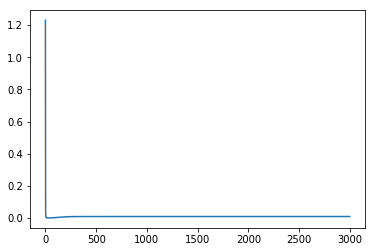

In [11]:
print(end-start)
plt.plot(epoch,Error)

In [12]:
Error[-1]

0.009303915022324638

In [30]:
epochs=600
eta=.00005
Error=[]
epoch=[]
w=np.random.randn(2,1)
steps=100
start=time.time()
for i in range(epochs):
    for a in range(int(X.shape[0]/steps)):
        z=X[a:(a+int(X.shape[0]/steps)),:].reshape(int(X.shape[0]/steps),X.shape[1])
        p=1/(1+np.exp(-z@w))
        w=w-eta*z.T@(p-y[a:(a+int(X.shape[0]/steps)),:].reshape(int(X.shape[0]/steps),y.shape[1]))
        Error.append(cost(y[a:(a+int(X.shape[0]/steps)),:].reshape(int(X.shape[0]/steps),y.shape[1]),p))
end=time.time()

0.5004901885986328


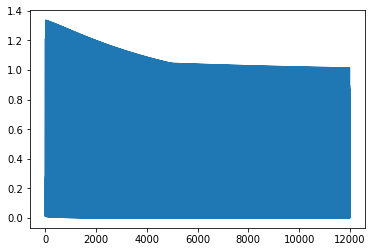

In [31]:
print(end-start)
plt.plot(range(len(Error)),Error)

In [32]:
p=1/(1+np.exp(-X@w))
cost(y,p)

0.00019216018874261467